In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
from numpy import random
pd.set_option('display.max_columns', None)

In [2]:
from nba_api.stats.endpoints import playbyplayv2
from nba_api.stats.endpoints import leaguegamelog
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import draftcombinestats

In [3]:
game_ids = leaguegamelog.LeagueGameLog().get_data_frames()[0]['GAME_ID'].drop_duplicates().reset_index(drop=True)

In [4]:
game_logs = playbyplayv2.PlayByPlayV2(game_id='0022100717').get_data_frames()[0]

In [5]:
game_logs[:2]

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,SCORE,SCOREMARGIN,PERSON1TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ID,PLAYER1_TEAM_CITY,PLAYER1_TEAM_NICKNAME,PLAYER1_TEAM_ABBREVIATION,PERSON2TYPE,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ID,PLAYER2_TEAM_CITY,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
0,0022100717,2,12,0,1,7:41 PM,12:00,None,Start of 1st Period (7:41 PM EST),None,None,None,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1
1,0022100717,4,7,4,1,7:41 PM,12:00,Williams III Violation:Jump Ball (C.Washington),None,None,None,None,4,1629057,Robert Williams III,1.610613e+09,Boston,Celtics,BOS,0,0,None,NaN,None,None,None,1,0,None,NaN,None,None,None,0


In [6]:
len(game_ids)

883

In [7]:
old_df = pd.read_csv('full jump df 02_20_22.csv', converters={'GAME_ID': '{:2}'.format})

In [8]:
old_df['GAME_ID'] = old_df['GAME_ID'].astype('string')

In [9]:
old_df

,GAME_ID,EVENTMSGTYPE,PLAYER1_ID,PLAYER1_TEAM_ID,PLAYER2_ID,PLAYER2_TEAM_ID
0,0021500003,10,101106,1610612744,203076,1610612740
1,0021500003,10,2571,1610612744,201582,1610612740
2,0021500003,10,203105,1610612744,203076,1610612740
3,0021500002,10,2200,1610612741,202389,1610612739
4,0021500001,10,201143,1610612737,203083,1610612765
...,...,...,...,...,...,...
13753,0022100885,10,1628970,1610612766,1628389,1610612748
13754,0022100885,10,1629023,1610612766,200782,1610612748
13755,0022100886,10,202685,1610612740,203939,1610612742
13756,0022100886,10,203468,1610612740,1630182,1610612742


In [10]:
new_ids = list(set(game_ids).difference(old_df['GAME_ID']))
len(new_ids)

1

In [11]:
%%time
## Create empty lists to append data
jump_df = pd.DataFrame(columns = ['GAME_ID', 'EVENTMSGTYPE', 'PLAYER1_ID', 'PLAYER1_TEAM_ID', 'PLAYER2_ID', 'PLAYER2_TEAM_ID'])

## iterate through each game_id
for i in range(len(new_ids)):
    
    ## store every new game in a df, overwrite everytime
    df = playbyplayv2.PlayByPlayV2(game_id=new_ids[i]).get_data_frames()[0][['GAME_ID', 'EVENTMSGTYPE', 'PLAYER1_ID', 'PLAYER1_TEAM_ID', 'PLAYER2_ID', 'PLAYER2_TEAM_ID']]
    
    jump_df = pd.concat([jump_df,df[df['EVENTMSGTYPE'] == 10]], ignore_index=True)
    time.sleep(1)
    
jump_df = pd.concat([old_df,jump_df], ignore_index=True)

Wall time: 1.18 s


In [12]:
len(old_df['GAME_ID'].unique()), len(jump_df['GAME_ID'].unique()), len(game_ids)

(7931, 7931, 883)

In [13]:
jump_df[['PLAYER1_TEAM_ID', 'PLAYER2_TEAM_ID']] = jump_df[['PLAYER1_TEAM_ID', 'PLAYER2_TEAM_ID']].astype('int')

In [14]:
jump_df.reset_index(drop=True, inplace=True)

In [15]:
# jump_df.to_csv('jump_df 02_19_22.csv', index=False)

In [16]:
jump_df

,GAME_ID,EVENTMSGTYPE,PLAYER1_ID,PLAYER1_TEAM_ID,PLAYER2_ID,PLAYER2_TEAM_ID
0,0021500003,10,101106,1610612744,203076,1610612740
1,0021500003,10,2571,1610612744,201582,1610612740
2,0021500003,10,203105,1610612744,203076,1610612740
3,0021500002,10,2200,1610612741,202389,1610612739
4,0021500001,10,201143,1610612737,203083,1610612765
...,...,...,...,...,...,...
13753,0022100885,10,1628970,1610612766,1628389,1610612748
13754,0022100885,10,1629023,1610612766,200782,1610612748
13755,0022100886,10,202685,1610612740,203939,1610612742
13756,0022100886,10,203468,1610612740,1630182,1610612742


In [17]:
jb_w = pd.DataFrame(jump_df['PLAYER1_ID'].value_counts().reset_index())
jb_w.columns = ['PLAYER1_ID', 'JumpBallWins']
jb_l = pd.DataFrame(jump_df['PLAYER2_ID'].value_counts().reset_index())
jb_l.columns = ['PLAYER2_ID', 'JumpBallLosses']

In [18]:
combo_totals = jb_w.merge(jb_l,  left_on='PLAYER1_ID', right_on='PLAYER2_ID', how='outer')

In [19]:
combo_totals[['JumpBallWins', 'JumpBallLosses']] = combo_totals[['JumpBallWins', 'JumpBallLosses']].fillna(value=0)

In [20]:
combo_totals['TotalJBs'] = combo_totals['JumpBallWins'] + combo_totals['JumpBallLosses']
combo_totals['JBWinPct'] = round(combo_totals['JumpBallWins'] / combo_totals['TotalJBs'],3)

In [21]:
jb_stats = combo_totals.copy()

In [22]:
jb_stats['PLAYER1_ID'] = jb_stats['PLAYER1_ID'].fillna(combo_totals['PLAYER2_ID'])

In [23]:
del jb_stats['PLAYER2_ID']

In [24]:
jb_stats['PLAYER1_ID'] = jb_stats['PLAYER1_ID'].astype('int')

In [25]:
jb_stats[jb_stats['PLAYER1_ID'] == 203500]

,PLAYER1_ID,JumpBallWins,JumpBallLosses,TotalJBs,JBWinPct
0,203500,318.0,319.0,637.0,0.499


In [26]:
len(jb_stats['PLAYER1_ID'].unique())

832

In [27]:
df_player_ids = jump_df[['PLAYER1_ID', 'PLAYER2_ID']].values.ravel()
unique_ids = pd.unique(df_player_ids)

In [28]:
len(unique_ids)

832

#### On 2-12-22, 380 unqiue_ids

In [43]:
# old_info = pd.read_csv('info_df 02_19_22.csv', converters={'GAME_ID': '{:2}'.format})

In [44]:
new_ids = list(set(unique_ids).difference(old_info['PERSON_ID']))
len(new_ids)

0

In [29]:
%%time
info_df = pd.DataFrame(columns = ['PERSON_ID', 'DISPLAY_FIRST_LAST', 'FROM_YEAR', 'TEAM_ID', 'TEAM_NAME', 'HEIGHT', 'WEIGHT'])

for i in range(len(unique_ids)):
    
    df = commonplayerinfo.CommonPlayerInfo(player_id=unique_ids[i]).get_data_frames()[0][['PERSON_ID', 'DISPLAY_FIRST_LAST', 'FROM_YEAR', 'TEAM_ID', 'TEAM_NAME', 'HEIGHT', 'WEIGHT']]

    info_df = pd.concat([info_df,df], ignore_index=True)
    time.sleep(1)
    
# info_df = pd.concat([old_info, info_df], ignore_index=True)

Wall time: 18min 50s


In [30]:
info_df.reset_index(drop=True, inplace=True)

In [31]:
# info_df.to_csv('info_df 02_24_22.csv', index=False)

In [33]:
info_df[:4]

,PERSON_ID,DISPLAY_FIRST_LAST,FROM_YEAR,TEAM_ID,TEAM_NAME,HEIGHT,WEIGHT
0,101106,Andrew Bogut,2005,1610612749,Bucks,7-0,260
1,203076,Anthony Davis,2012,1610612747,Lakers,6-10,253
2,2571,Leandro Barbosa,2003,1610612756,Suns,6-3,194
3,201582,Alexis Ajinca,2008,1610612740,Pelicans,7-2,248


In [34]:
info_df['HEIGHT'] = [s.split('-') for s in info_df.HEIGHT]
info_df['HEIGHT'] = [int(i[0])*12 + int(i[1]) for i in info_df['HEIGHT']]

In [35]:
info_df['TEAM_NAME'] = info_df['TEAM_NAME'].fillna('FA')

In [36]:
info_df['WEIGHT'] = info_df['WEIGHT'].astype('int')

In [38]:
info_df[:4]

,PERSON_ID,DISPLAY_FIRST_LAST,FROM_YEAR,TEAM_ID,TEAM_NAME,HEIGHT,WEIGHT
0,101106,Andrew Bogut,2005,1610612749,Bucks,84,260
1,203076,Anthony Davis,2012,1610612747,Lakers,82,253
2,2571,Leandro Barbosa,2003,1610612756,Suns,75,194
3,201582,Alexis Ajinca,2008,1610612740,Pelicans,86,248


In [39]:
comb_df = pd.read_csv('combine_df 02_19_22.csv')

In [40]:
years = info_df['FROM_YEAR'].unique()

In [41]:
len(info_df['FROM_YEAR'].unique()), len(comb_df['SEASON'].unique())

(27, 22)

### Get combine data

In [42]:
# %%time
# comb_df = pd.DataFrame()

# for i in range(len(years)):
    
#     df = draftcombinestats.DraftCombineStats(season_all_time=years[i]).get_data_frames()[0]

#     comb_df = pd.concat([comb_df,df], ignore_index=True)
#     time.sleep(1)

In [43]:
# comb_df.to_csv('combine_df 02_19_22.csv', index=False)

In [44]:
pre_jump = info_df.merge(comb_df[['PLAYER_ID', 'WINGSPAN', 'SEASON']], left_on=['PERSON_ID','FROM_YEAR'], right_on=['PLAYER_ID', 'SEASON'], how='left')

In [45]:
len(pre_jump) == len(info_df)

True

In [46]:
pre_jump[:1]

,PERSON_ID,DISPLAY_FIRST_LAST,FROM_YEAR,TEAM_ID,TEAM_NAME,HEIGHT,WEIGHT,PLAYER_ID,WINGSPAN,SEASON
0,101106,Andrew Bogut,2005,1610612749,Bucks,84,260,101106.0,87.0,2005.0


### Split jump_fd by player 1 and player 2 - add player info - rejoin back together

In [47]:
pre_jump_v1 = jump_df.merge(pre_jump, left_on='PLAYER1_ID', right_on='PERSON_ID', how='inner')

In [48]:
pre_jump_v1 = pre_jump_v1.merge(pre_jump, left_on='PLAYER2_ID', right_on='PERSON_ID', how='inner')

In [49]:
pre_jump_v1[:1]

,GAME_ID,EVENTMSGTYPE,PLAYER1_ID,PLAYER1_TEAM_ID,PLAYER2_ID,PLAYER2_TEAM_ID,PERSON_ID_x,DISPLAY_FIRST_LAST_x,FROM_YEAR_x,TEAM_ID_x,TEAM_NAME_x,HEIGHT_x,WEIGHT_x,PLAYER_ID_x,WINGSPAN_x,SEASON_x,PERSON_ID_y,DISPLAY_FIRST_LAST_y,FROM_YEAR_y,TEAM_ID_y,TEAM_NAME_y,HEIGHT_y,WEIGHT_y,PLAYER_ID_y,WINGSPAN_y,SEASON_y
0,0021500003,10,101106,1610612744,203076,1610612740,101106,Andrew Bogut,2005,1610612749,Bucks,84,260,101106.0,87.0,2005.0,203076,Anthony Davis,2012,1610612747,Lakers,82,253,203076.0,89.5,2012.0


In [50]:
pre_jump_v1.drop(['EVENTMSGTYPE', 'PERSON_ID_x', 'TEAM_ID_x', 'PERSON_ID_y', 'TEAM_ID_y', 'FROM_YEAR_x', 'FROM_YEAR_y', 
                  'SEASON_x', 'SEASON_y', 'PLAYER_ID_x', 'PLAYER_ID_y'], axis=1, inplace=True)

In [51]:
pre_jump_v1[:1]

,GAME_ID,PLAYER1_ID,PLAYER1_TEAM_ID,PLAYER2_ID,PLAYER2_TEAM_ID,DISPLAY_FIRST_LAST_x,TEAM_NAME_x,HEIGHT_x,WEIGHT_x,WINGSPAN_x,DISPLAY_FIRST_LAST_y,TEAM_NAME_y,HEIGHT_y,WEIGHT_y,WINGSPAN_y
0,0021500003,101106,1610612744,203076,1610612740,Andrew Bogut,Bucks,84,260,87.0,Anthony Davis,Lakers,82,253,89.5


In [52]:
pre_jump_v1.rename(columns={'PLAYER1_TEAM_ID': 'P1_TM_ID', 'PLAYER2_TEAM_ID': 'P2_TM_ID', 
                         'DISPLAY_FIRST_LAST_x' : 'P1_NM', 'TEAM_NAME_x' : 'P1_TM_NM', 
                         'HEIGHT_x' : 'P1_HT', 'WEIGHT_x' : 'P1_WT', 'DISPLAY_FIRST_LAST_y' : 'P2_NM', 
                         'TEAM_NAME_y' : 'P2_TM_NM', 'HEIGHT_y' : 'P2_HT', 'WEIGHT_y' : 'P2_WT', 'WINGSPAN_x' : 'P1_WS', 'WINGSPAN_y' : 'P2_WS'}, inplace=True)

In [53]:
pre_jump_v2 = pre_jump_v1[['GAME_ID', 'PLAYER1_ID', 'P1_TM_ID', 'P1_TM_NM', 'P1_HT', 'P1_WT', 'P1_WS', 'PLAYER2_ID', 'P2_TM_ID', 'P2_TM_NM', 'P2_HT', 'P2_WT', 'P2_WS']]

In [54]:
pre_jump_v2[pre_jump_v2['GAME_ID'] == '0022100055']

,GAME_ID,PLAYER1_ID,P1_TM_ID,P1_TM_NM,P1_HT,P1_WT,P1_WS,PLAYER2_ID,P2_TM_ID,P2_TM_NM,P2_HT,P2_WT,P2_WS
2837,0022100055,1628964,1610612753,Magic,84,231,94.0,203486,1610612766,Hornets,83,254,83.00
9214,0022100055,1630591,1610612753,Magic,77,205,NaN,202330,1610612766,Hornets,79,225,79.75


In [55]:
pre_jump_v2['P1_WS'] = pre_jump_v2['P1_WS'].fillna(pre_jump_v2['P1_HT'])
pre_jump_v2['P2_WS'] = pre_jump_v2['P2_WS'].fillna(pre_jump_v2['P2_HT'])

C:\Users\llove410\AppData\Local\Temp/ipykernel_20460/3375454941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_jump_v2['P1_WS'] = pre_jump_v2['P1_WS'].fillna(pre_jump_v2['P1_HT'])
C:\Users\llove410\AppData\Local\Temp/ipykernel_20460/3375454941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_jump_v2['P2_WS'] = pre_jump_v2['P2_WS'].fillna(pre_jump_v2['P2_HT'])


In [56]:
pre_jump_v2['P1_HT_DIFF'] = pre_jump_v2['P1_HT'] - pre_jump_v2['P2_HT']
pre_jump_v2['P2_HT_DIFF'] = pre_jump_v2['P2_HT'] - pre_jump_v2['P1_HT']
pre_jump_v2['P1_WT_DIFF'] = pre_jump_v2['P1_WT'] - pre_jump_v2['P2_WT']
pre_jump_v2['P2_WT_DIFF'] = pre_jump_v2['P2_WT'] - pre_jump_v2['P1_WT']
pre_jump_v2['P1_WS_DIFF'] = pre_jump_v2['P1_WS'] - pre_jump_v2['P2_WS']
pre_jump_v2['P2_WS_DIFF'] = pre_jump_v2['P2_WS'] - pre_jump_v2['P1_WS']

C:\Users\llove410\AppData\Local\Temp/ipykernel_20460/1953978302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_jump_v2['P1_HT_DIFF'] = pre_jump_v2['P1_HT'] - pre_jump_v2['P2_HT']


In [57]:
pre_jump_v2

,GAME_ID,PLAYER1_ID,P1_TM_ID,P1_TM_NM,P1_HT,P1_WT,P1_WS,PLAYER2_ID,P2_TM_ID,P2_TM_NM,P2_HT,P2_WT,P2_WS,P1_HT_DIFF,P2_HT_DIFF,P1_WT_DIFF,P2_WT_DIFF,P1_WS_DIFF,P2_WS_DIFF
0,0021500003,101106,1610612744,Bucks,84,260,87.00,203076,1610612740,Lakers,82,253,89.5,2,-2,7,-7,-2.50,2.50
1,0021500996,101106,1610612744,Bucks,84,260,87.00,203076,1610612740,Lakers,82,253,89.5,2,-2,7,-7,-2.50,2.50
2,0021600250,101106,1610612742,Bucks,84,260,87.00,203076,1610612740,Lakers,82,253,89.5,2,-2,7,-7,-2.50,2.50
3,0021500003,203105,1610612744,Warriors,83,265,89.75,203076,1610612740,Lakers,82,253,89.5,1,-1,12,-12,0.25,-0.25
4,0021500348,2200,1610612741,Lakers,84,250,84.00,203076,1610612740,Lakers,82,253,89.5,2,-2,-3,3,-5.50,5.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13753,0022100474,1630526,1610612760,Thunder,80,242,81.75,1627822,1610612743,,83,220,83.0,-3,3,22,-22,-1.25,1.25
13754,0022100370,1629622,1610612748,Heat,77,215,77.00,1630606,1610612749,Heat,76,205,76.0,1,-1,10,-10,1.00,-1.00
13755,0022100552,1630565,1610612755,,77,210,82.75,1630243,1610612745,Rockets,78,190,78.0,-1,1,20,-20,4.75,-4.75
13756,0022100554,1630561,1610612751,Nets,76,204,80.75,1630583,1610612763,Grizzlies,83,215,83.0,-7,7,-11,11,-2.25,2.25


In [58]:
jb_winners = pre_jump_v2[['PLAYER1_ID', 'P1_HT', 'P1_WT', 'P1_WS', 'P1_HT_DIFF', 'P1_WT_DIFF', 'P1_WS_DIFF']]
jb_losers = pre_jump_v2[['PLAYER2_ID', 'P2_HT', 'P2_WT', 'P2_WS', 'P2_HT_DIFF', 'P2_WT_DIFF', 'P2_WS_DIFF']]

In [59]:
len(jb_winners), len(jb_losers)

(13758, 13758)

In [60]:
final_winners = jb_winners.merge(jb_stats, left_on='PLAYER1_ID', right_on='PLAYER1_ID', how='inner').copy()
final_losers = jb_losers.merge(jb_stats, left_on='PLAYER2_ID', right_on='PLAYER1_ID', how='inner').copy()

In [61]:
final_losers.drop('PLAYER1_ID', axis=1, inplace=True)

In [62]:
final_winners.rename(columns={'PLAYER1_ID': 'PLAYER_ID', 'P1_HT': 'HT', 'P1_WT' : 'WT', 'P1_HT_DIFF' : 'HT_DIFF', 
                              'P1_WT_DIFF' : 'WT_DIFF', 'P1_WS' : 'WS', 'P1_WS_DIFF' : 'WS_DIFF'}, inplace=True)

In [63]:
final_losers.rename(columns={'PLAYER2_ID': 'PLAYER_ID', 'P2_HT': 'HT', 'P2_WT' : 'WT', 'P2_HT_DIFF' : 'HT_DIFF', 
                             'P2_WT_DIFF' : 'WT_DIFF', 'P2_WS' : 'WS', 'P2_WS_DIFF' : 'WS_DIFF'}, inplace=True)

In [64]:
len(final_winners),len(final_losers)

(13758, 13758)

In [65]:
final_winners['Won'] = 1
final_losers['Won'] = 0

In [66]:
final_winners[:1]

,PLAYER_ID,HT,WT,WS,HT_DIFF,WT_DIFF,WS_DIFF,JumpBallWins,JumpBallLosses,TotalJBs,JBWinPct,Won
0,101106,84,260,87.0,2,7,-2.5,57.0,50.0,107.0,0.533,1


In [67]:
final_losers[:1]

,PLAYER_ID,HT,WT,WS,HT_DIFF,WT_DIFF,WS_DIFF,JumpBallWins,JumpBallLosses,TotalJBs,JBWinPct,Won
0,203076,82,253,89.5,-2,-7,2.5,221.0,218.0,439.0,0.503,0


In [68]:
final_df = pd.concat([final_winners, final_losers], ignore_index=True)

C:\Users\llove410\AppData\Local\Temp/ipykernel_20460/3276123413.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  final_df.hist(ax = ax)


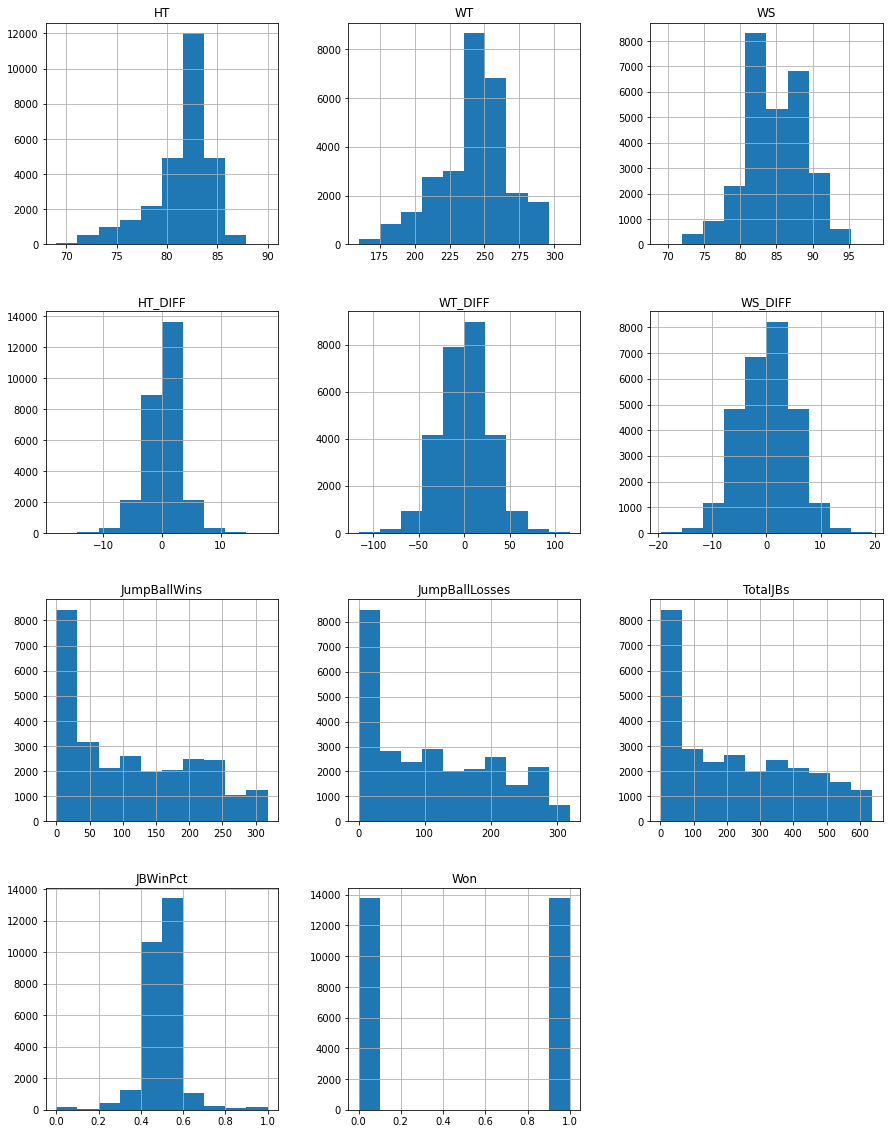

In [70]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
final_df.hist(ax = ax)
plt.show()

In [91]:
final_df.describe()

,HT,WT,WS,HT_DIFF,WT_DIFF,WS_DIFF,JumpBallWins,JumpBallLosses,TotalJBs,JBWinPct,Won
count,27516.000000,27516.000000,27516.000000,27516.000000,27516.000000,27516.000000,27516.000000,27516.000000,27516.000000,27516.00000,27516.000000
mean,81.480702,243.976595,81.480702,0.000000,0.000000,0.000000,114.022750,111.558729,225.581480,0.49999,0.500000
std,2.846198,24.522892,2.846198,2.937832,27.243715,2.937832,96.527233,93.440415,189.651065,0.08872,0.500009
min,69.000000,160.000000,69.000000,-18.000000,-116.000000,-18.000000,0.000000,0.000000,1.000000,0.00000,0.000000
25%,81.000000,232.000000,81.000000,-2.000000,-17.000000,-2.000000,19.000000,21.000000,39.000000,0.48300,0.000000
50%,82.000000,248.000000,82.000000,0.000000,0.000000,0.000000,97.000000,96.000000,201.000000,0.50000,0.500000
75%,83.000000,260.000000,83.000000,2.000000,17.000000,2.000000,201.000000,183.000000,380.000000,0.52700,1.000000
max,90.000000,311.000000,90.000000,18.000000,116.000000,18.000000,318.000000,319.000000,637.000000,1.00000,1.000000


# MODELING

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.preprocessing import Normalizer

/usr/local/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [133]:
# subset
gt_10 = final_df[final_df['TotalJBs'] >= 500].copy()

In [134]:
train, test = train_test_split(gt_10.drop('PLAYER_ID', axis=1), test_size=.20, random_state=2122, stratify=gt_10['Won'])

In [135]:
X_train = train.drop('Won', axis=1).copy()
y_train = train['Won'].copy()
X_test = test.drop('Won', axis=1).copy()
y_test = test['Won'].copy()

In [151]:
X_train

,HT,WT,WS,HT_DIFF,WT_DIFF,WS_DIFF,JumpBallWins,JumpBallLosses,TotalJBs,JBWinPct
1405,82,279,82,-1,14,-1,265.0,263.0,528.0,0.502
16246,85,258,85,2,-7,2,262.0,264.0,526.0,0.498
645,84,282,84,2,12,2,252.0,266.0,518.0,0.486
5114,85,258,85,6,1,6,262.0,264.0,526.0,0.498
2537,83,265,83,0,15,0,318.0,319.0,637.0,0.499
...,...,...,...,...,...,...,...,...,...,...
2639,83,265,83,-1,15,-1,318.0,319.0,637.0,0.499
19023,82,260,82,3,51,3,254.0,254.0,508.0,0.500
15824,83,265,83,0,15,0,318.0,319.0,637.0,0.499
19030,82,260,82,-1,20,-1,254.0,254.0,508.0,0.500


In [136]:
std = StandardScaler()
# norm = Normalizer()

In [137]:
X_train_prep = std.fit_transform(X_train)
X_test_prep = std.transform(X_test)
# X_train_prep = norm.fit_transform(X_train)
# X_test_prep = norm.transform(X_test)

In [138]:
log_clf = LogisticRegression(max_iter=1000)
# svm_clf = SVC()
# xgb_clf = xgb.XGBClassifier(gamma=.1)

In [139]:
log_clf.fit(X_train_prep, y_train)
# svm_clf.fit(X_train_prep, y_train)
# xgb_clf.fit(X_train_prep, y_train)

LogisticRegression(max_iter=1000)

In [140]:
log_preds = log_clf.predict(X_test_prep)
# svm_preds = svm_clf.predict(X_test_prep)
# xgb_preds = xgb_clf.predict(X_test_prep)

In [141]:
# accuracy_score(y_test, xgb_preds)
# accuracy_score(y_test, svm_preds)
accuracy_score(y_test, log_preds)

0.4924698795180723

In [143]:
print(classification_report(y_test, log_preds))

              precision    recall  f1-score   support

           0       0.49      0.46      0.47       330
           1       0.50      0.53      0.51       334

    accuracy                           0.49       664
   macro avg       0.49      0.49      0.49       664
weighted avg       0.49      0.49      0.49       664



In [144]:
param_grid = [
    {'max_iter': random.randint(100,1000,3), 'C': [.1,.5,1], 'penalty': ['l2'], 'solver': ['lbfgs'], 'tol': [.01, .001, .0001]},
    {'max_iter': random.randint(100,1000,3), 'penalty': ['none'], 'tol': [.01, .001, .0001]},  
    {'max_iter': random.randint(100,1000,3), 'C': [.1,.5,1], 'penalty': ['l1'], 'solver': ['liblinear'], 'tol': [.01, .001, .0001]},
    {'max_iter': random.randint(100,1000,3), 'C': [.1,.5,1], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio':[.25, .5, .75], 'tol': [.01, .001, .0001]}
]

In [145]:
log_clf = LogisticRegression()
log_grid = RandomizedSearchCV(log_clf, param_grid, cv=5, scoring='accuracy',
                           return_train_score=True)
log_grid.fit(X_train_prep, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions=[{'C': [0.1, 0.5, 1],
                                         'max_iter': array([436, 485, 810]),
                                         'penalty': ['l2'], 'solver': ['lbfgs'],
                                         'tol': [0.01, 0.001, 0.0001]},
                                        {'max_iter': array([208, 586, 540]),
                                         'penalty': ['none'],
                                         'tol': [0.01, 0.001, 0.0001]},
                                        {'C': [0.1, 0.5, 1],
                                         'max_iter': array([677, 594, 647]),
                                         'penalty': ['l1'],
                                         'solver': ['liblinear'],
                                         'tol': [0.01, 0.001, 0.0001]},
                                        {'C': [0.1, 0.5, 1],
                                         'l1

In [146]:
cvres = log_grid.cv_results_
grid_log_df = pd.DataFrame({
    "Train_Error": cvres["mean_train_score"],
    "Test_Error": cvres["mean_test_score"],
    "Parameter_Set": cvres["params"],
}).sort_index()
pd.set_option('display.max_colwidth', None)
grid_log_df.tail(10)

,Train_Error,Test_Error,Parameter_Set
0,0.515819,0.492655,"{'tol': 0.0001, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 594, 'C': 1}"
1,0.514595,0.492279,"{'tol': 0.01, 'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 810, 'C': 1}"
2,0.515348,0.491525,"{'tol': 0.0001, 'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 810, 'C': 0.1}"
3,0.514972,0.491525,"{'tol': 0.001, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 952, 'l1_ratio': 0.25, 'C': 0.5}"
4,0.514972,0.491149,"{'tol': 0.01, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 874, 'l1_ratio': 0.25, 'C': 0.5}"
5,0.515348,0.491525,"{'tol': 0.001, 'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 485, 'C': 0.1}"
6,0.516102,0.491149,"{'tol': 0.0001, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 874, 'l1_ratio': 0.75, 'C': 0.1}"
7,0.516290,0.485499,"{'tol': 0.0001, 'penalty': 'none', 'max_iter': 540}"
8,0.515443,0.492655,"{'tol': 0.01, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 952, 'l1_ratio': 0.75, 'C': 1}"
9,0.517326,0.491902,"{'tol': 0.01, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 874, 'l1_ratio': 0.5, 'C': 0.1}"


In [147]:
final_model = log_grid.best_estimator_
log_preds = final_model.predict(X_test_prep)
logmod_pred_score = accuracy_score(y_test, log_preds)
logmod_recall = recall_score(y_test, log_preds, pos_label=1)

In [148]:
print('Train accuracy = %.2f%%' % ((log_grid.best_score_) * 100))
print('Test accuracy = %.2f%%' % ((logmod_pred_score) * 100))
print('Test Recall = %.2f%%' % (logmod_recall * 100))

Train accuracy = 49.27%
Test accuracy = 48.34%
Test Recall = 52.10%


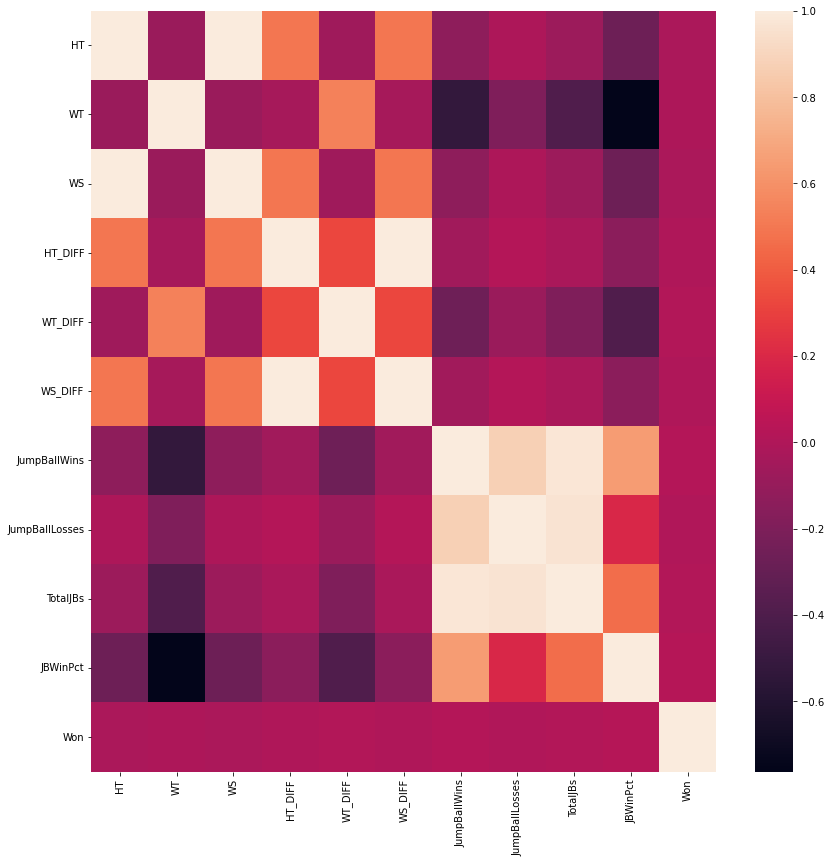

In [149]:
plt.figure(figsize = (14,14))
sns.heatmap(train.corr())
plt.show()